In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
reeses = cv2.imread('Images/reeses.png')
reeses = cv2.cvtColor(reeses,cv2.COLOR_BGR2RGB)
cereals = cv2.imread('Images/cereals.jpg')
cereals = cv2.cvtColor(cereals,cv2.COLOR_BGR2RGB)

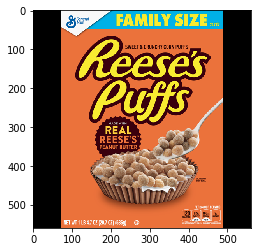

In [6]:
plt.imshow(reeses)

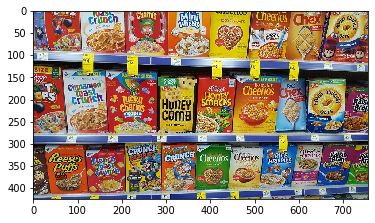

In [7]:
plt.imshow(cereals)

# Brute Force Matching

In [45]:
def matchBF(desired_object,full_photo,matches_count=None):
    # Create Orb Detector Object
    orb = cv2.ORB_create()
    
    # Detects keypoints and computes the descriptors
    queryKeypoints, queryDescriptors = orb.detectAndCompute(desired_object,None)
    trainKeypoints, trainDescriptors = orb.detectAndCompute(full_photo,None)
    
    # Create Brute Force Matching Object
    bruteforce = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)
    
    # Get Matching
    matches = bruteforce.match(queryDescriptors,trainDescriptors)
    
    # Sort the match by its distance
    matches = sorted(matches,key=lambda match:match.distance)
    
    if matches_count == None:
        matches_sliced = matches[:25]
    elif matches_count == 'All':
        matches_sliced = matches
    else:
        matches_sliced = matches[:matches_count]
    result_matches = cv2.drawMatches(desired_object,queryKeypoints,full_photo,trainKeypoints,matches_sliced,None,flags=2)
    
    plt.figure(figsize=(15,15))
    plt.imshow(result_matches)

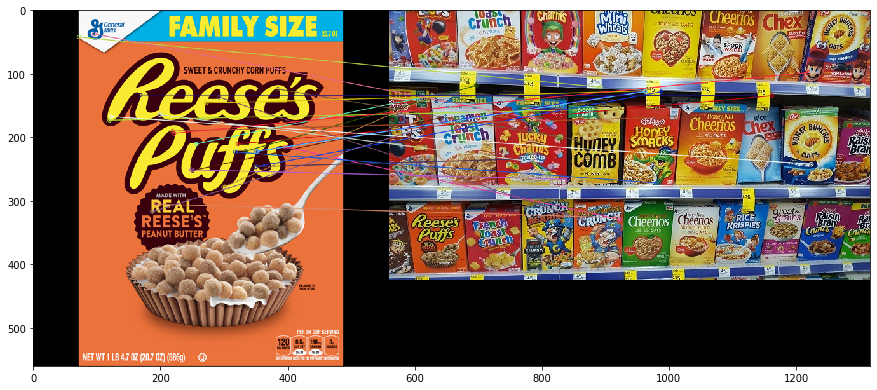

In [52]:
matchBF(reeses,cereals)

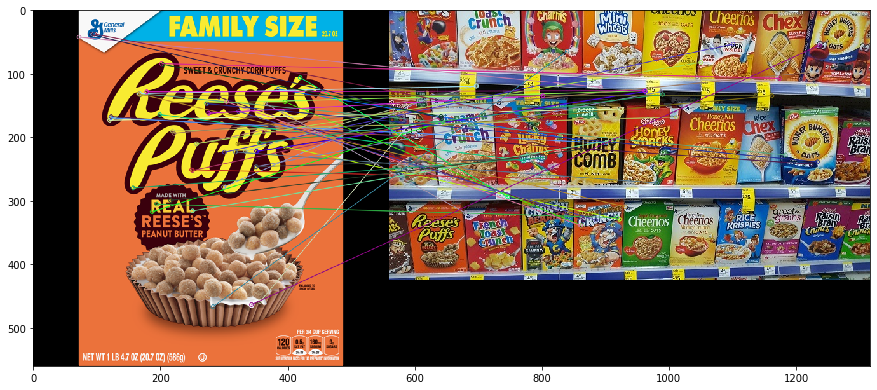

In [47]:
matchBF(reeses,cereals,matches_count=50)

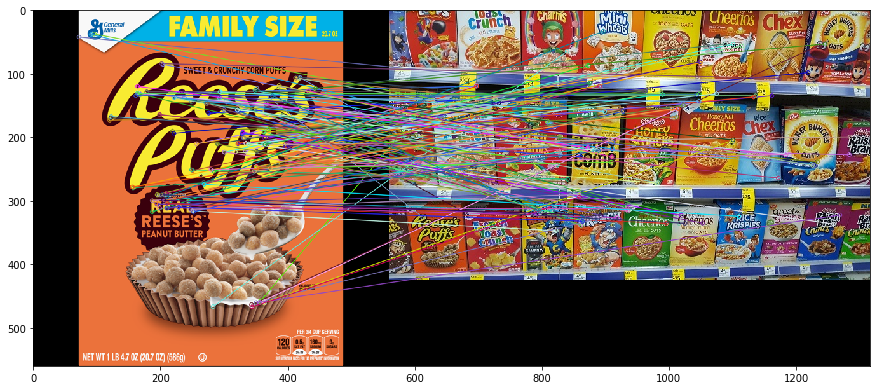

In [48]:
matchBF(reeses,cereals,matches_count='All')

# KNN Matching (Removed on CV2 Version > 3.4.2)

In [50]:
def matchKNN(desired_object,full_photo,matches_count=None):
    # Create Orb Detector Object
    sift = cv2.xfeatures2d.SIFT_create()
    
    # Detects keypoints and computes the descriptors
    queryKeypoints, queryDescriptors = sift.detectAndCompute(desired_object,None)
    trainKeypoints, trainDescriptors = sift.detectAndCompute(full_photo,None)
    
    # Create Brute Force Matching Object
    bruteforce = cv2.BFMatcher()
    matches = bruteforce.knnMatch(queryDescriptors,trainDescriptors,k=2)
    
    # Filter matches by distance
    good_matches = []
    for match1,match2 in matches:
        if match1.disance < 0.75*match2.distance:
            good_matches.append([match1])
    
    result_matches = cv2.drawMatchesKnn(desired_object,queryKeypoints,full_photo,trainKeypoints,matches_sliced,None,flags=2)
    
    plt.figure(figsize=(15,15))
    plt.imshow(result_matches)